In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from arch import arch_model

In [2]:
# Simulate some data
np.random.seed(42)
n = 1000
omega = 0.2
alpha = 0.5
beta = 0.4

In [3]:
# Generate GARCH(1,1) process
returns = np.random.normal(size=n)
volatility = np.zeros(n)
volatility[0] = np.std(returns)
for t in range(1, n):
    volatility[t] = np.sqrt(omega + alpha * returns[t-1]**2 + beta * volatility[t-1]**2)
    returns[t] *= volatility[t]

In [4]:
# Convert to a DataFrame
data = pd.DataFrame({'Returns': returns})

# Fit a more complex GARCH model (e.g., GARCH(2,2))
model = arch_model(data['Returns'], vol='Garch', p=2, q=2)
garch_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 4283.469726072107
Iteration:      2,   Func. Count:     18,   Neg. LLF: 424859.7451946015
Iteration:      3,   Func. Count:     26,   Neg. LLF: 1457.884744939824
Iteration:      4,   Func. Count:     36,   Neg. LLF: 1399.347218611844
Iteration:      5,   Func. Count:     44,   Neg. LLF: 4676.60057222367
Iteration:      6,   Func. Count:     52,   Neg. LLF: 1408.087879010933
Iteration:      7,   Func. Count:     60,   Neg. LLF: 1391.875050683894
Iteration:      8,   Func. Count:     68,   Neg. LLF: 1368.1092925678442
Iteration:      9,   Func. Count:     76,   Neg. LLF: 1367.2238864136082
Iteration:     10,   Func. Count:     84,   Neg. LLF: 1368.1892991715695
Iteration:     11,   Func. Count:     92,   Neg. LLF: 1365.5374682674662
Iteration:     12,   Func. Count:     99,   Neg. LLF: 1365.5137601723086
Iteration:     13,   Func. Count:    106,   Neg. LLF: 1365.5112989724626
Iteration:     14,   Func. Count:    113,   Neg. LLF: 1365.

In [5]:
# Print the summary
print(garch_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1365.51
Distribution:                  Normal   AIC:                           2743.02
Method:            Maximum Likelihood   BIC:                           2772.47
                                        No. Observations:                 1000
Date:                Sat, Aug 10 2024   Df Residuals:                      999
Time:                        09:12:29   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0101  2.431e-02      0.417      0.677 

In [6]:
# Forecast volatility
forecasts = garch_fit.forecast(horizon=10)
forecasted_volatility = forecasts.variance[-1:]

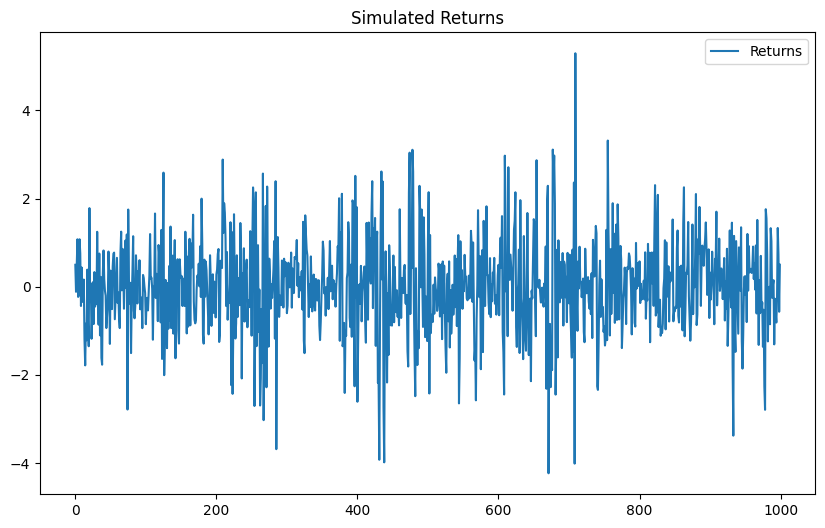

In [7]:
# Plot the simulated returns
plt.figure(figsize=(10, 6))
plt.plot(data['Returns'], label='Returns')
plt.title('Simulated Returns')
plt.legend()
plt.show()

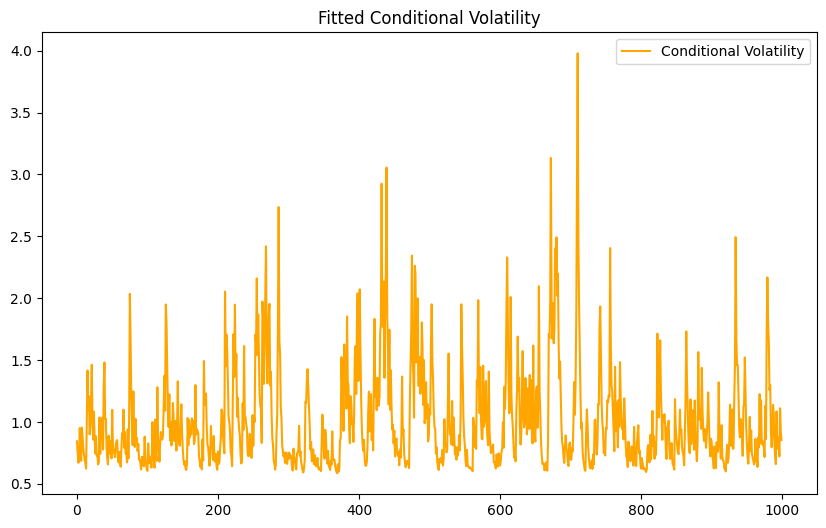

In [8]:
# Plot the fitted conditional volatility
plt.figure(figsize=(10, 6))
plt.plot(garch_fit.conditional_volatility, label='Conditional Volatility', color='orange')
plt.title('Fitted Conditional Volatility')
plt.legend()
plt.show()

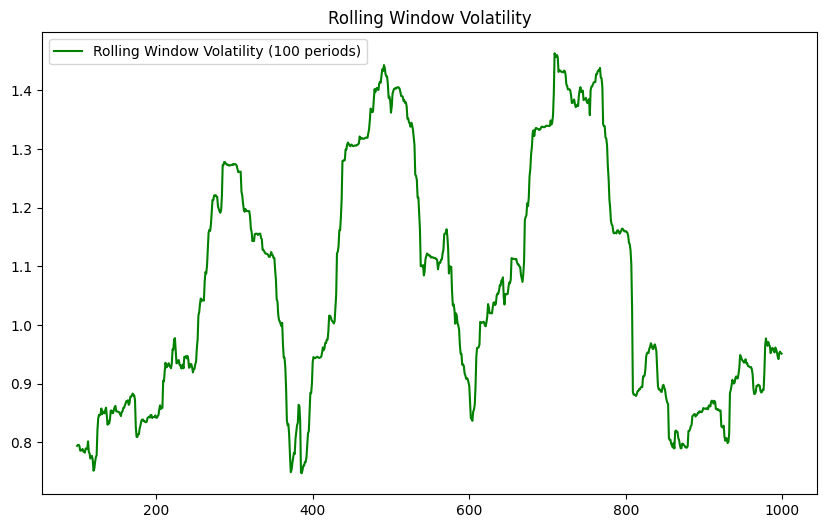

In [9]:
# Rolling window volatility plot
rolling_window = 100
rolling_volatility = data['Returns'].rolling(window=rolling_window).std()

plt.figure(figsize=(10, 6))
plt.plot(rolling_volatility, label=f'Rolling Window Volatility ({rolling_window} periods)', color='green')
plt.title('Rolling Window Volatility')
plt.legend()
plt.show()

In [10]:
# Diagnostic plots
# Residuals and their autocorrelation
residuals = garch_fit.resid
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

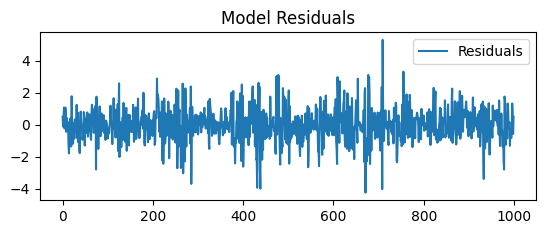

In [11]:
plt.subplot(2, 1, 1)
plt.plot(residuals, label='Residuals')
plt.title('Model Residuals')
plt.legend()

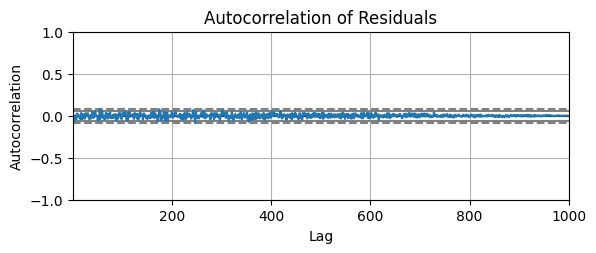

In [12]:
plt.subplot(2, 1, 2)
pd.plotting.autocorrelation_plot(residuals)
plt.title('Autocorrelation of Residuals')
plt.show()

In [13]:
# Heatmap of conditional variances
cond_vars = garch_fit.conditional_volatility ** 2
data['Conditional Variance'] = cond_vars

In [14]:
# Create heatmap data
heatmap_data = pd.DataFrame({
    'Conditional Variance': cond_vars
})

In [15]:
# Reshape the data for the heatmap
heatmap_matrix = heatmap_data.values.reshape(-1, 50)  # Reshape to 50 columns

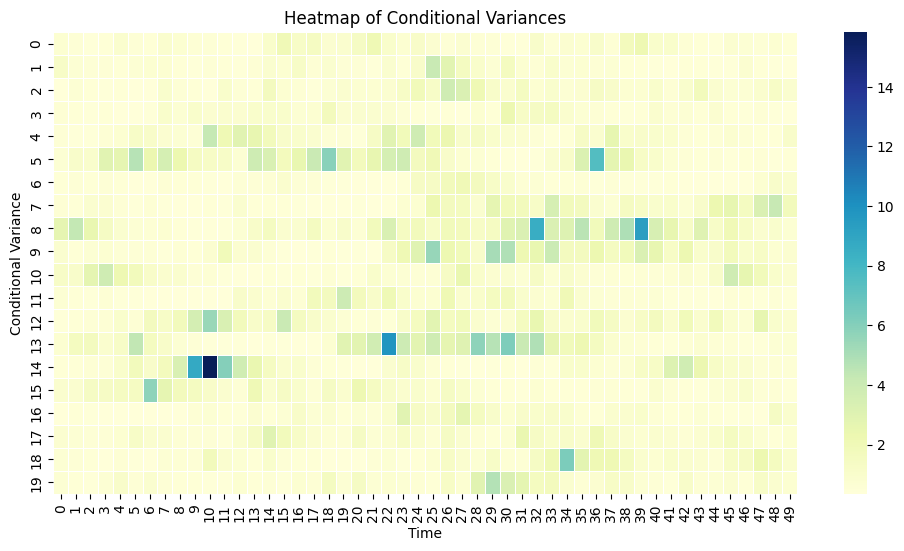

In [16]:
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_matrix, cmap='YlGnBu', annot=False, linewidths=0.5)
plt.title('Heatmap of Conditional Variances')
plt.xlabel('Time')
plt.ylabel('Conditional Variance')
plt.show()

In [17]:
# Normalize for better heatmap visibility
heatmap_matrix_normalized = (heatmap_matrix - heatmap_matrix.min()) / (heatmap_matrix.max() - heatmap_matrix.min())

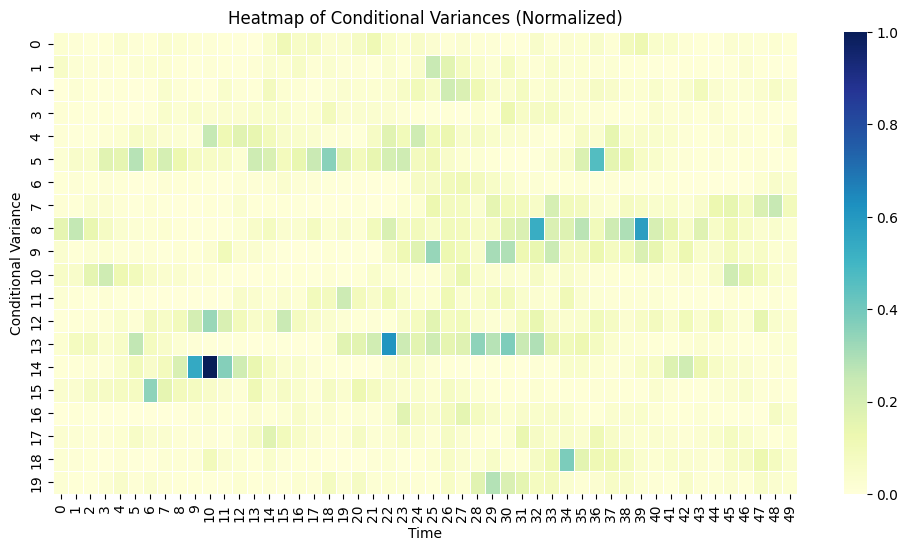

In [18]:
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_matrix_normalized, cmap='YlGnBu', annot=False, linewidths=0.5)
plt.title('Heatmap of Conditional Variances (Normalized)')
plt.xlabel('Time')
plt.ylabel('Conditional Variance')
plt.show()

In [19]:
# Print performance metrics
aic = garch_fit.aic
bic = garch_fit.bic
print(f"Akaike Information Criterion (AIC): {aic}")
print(f"Bayesian Information Criterion (BIC): {bic}")

Akaike Information Criterion (AIC): 2743.022395488165
Bayesian Information Criterion (BIC): 2772.4689271620578


In [20]:
# Print forecasted volatility
print(f"Forecasted Volatility for the next 10 periods: {forecasted_volatility.values}")

Forecasted Volatility for the next 10 periods: [[0.61043319 0.73433702 0.81101076 0.88214438 0.94358352 0.99723357
  1.04400152 1.08478118 1.12033779 1.15134052]]
